Dado el dataset con la información de los pasajeros del titanic que puedes cargar con el código anterior, realiza los siguientes ejercicios (realizando gestión de nulos):

Representa mediante un histograma (utilizando sns.distplot) la tarifa pagada por los pasajeros (fare). Utiliza 20 bins y muestra dos gráficas, una con la estimación de la probabilidad y otra sin ella.
Para crear dos ejes dentro de un gráfico deberás hacer uso de matplotlib.


In [3]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")



C:\Users\Usuario\AppData\Local\Temp\ipykernel_13684\3760943766.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['fare'].fillna(titanic['fare'].median(), inplace=True)


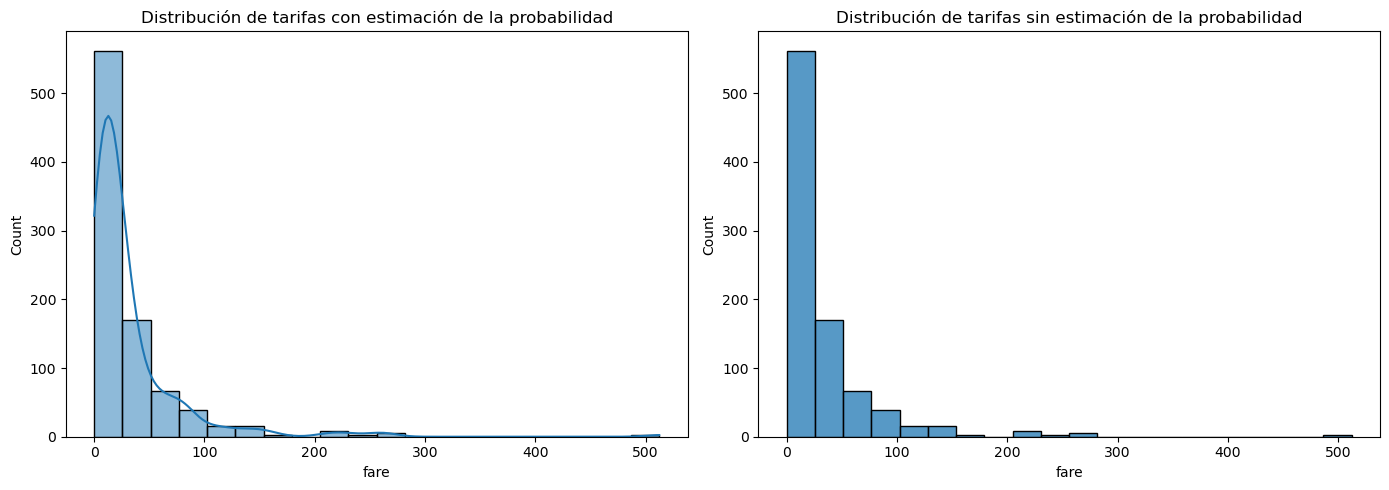

In [10]:
import matplotlib.pyplot as plt
# Rellenar los valores faltantes en la columna 'fare' (tarifa) con el valor mediano
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graficar histograma con estimación de la probabilidad
sns.histplot(titanic['fare'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución de tarifas con estimación de la probabilidad')

# Graficar histograma sin estimación de la probabilidad
sns.histplot(titanic['fare'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Distribución de tarifas sin estimación de la probabilidad')

plt.tight_layout()
plt.show()


Representa la distribución de edades de los pasajeros con un histograma (utilizando sns.kdeplot). Incluye el parámetro hue para diferenciar por la variable sex.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13684\1756915592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


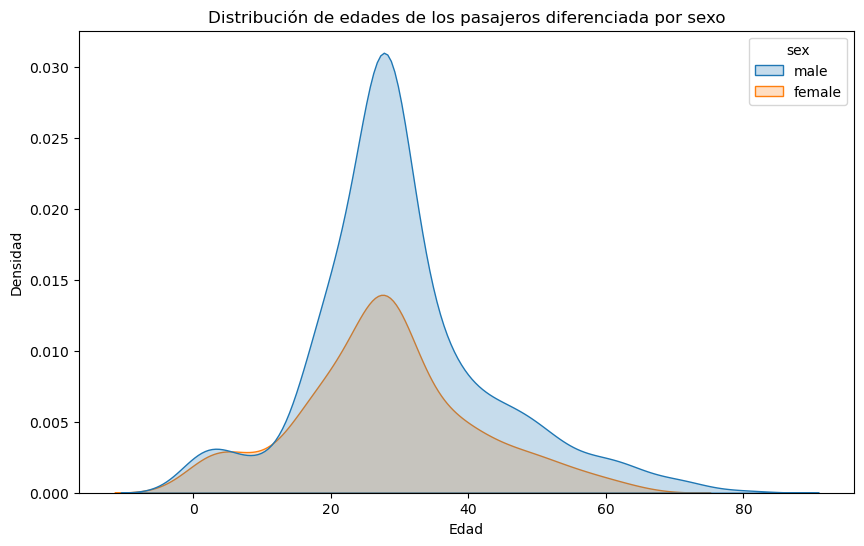

In [11]:
# Rellenar los valores faltantes en la columna 'age' con el valor mediano
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la distribución de edades diferenciando por sexo
sns.kdeplot(data=titanic, x='age', hue='sex', fill=True)

plt.title('Distribución de edades de los pasajeros diferenciada por sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

Representa la relación entre tarifa y edad.
Usa un diagrama de dispersión con sns.scatterplot.
Incluye el parámetro hue para diferenciar por survived y size para escalar los puntos según la cantidad de hermanos/esposos (sibsp).


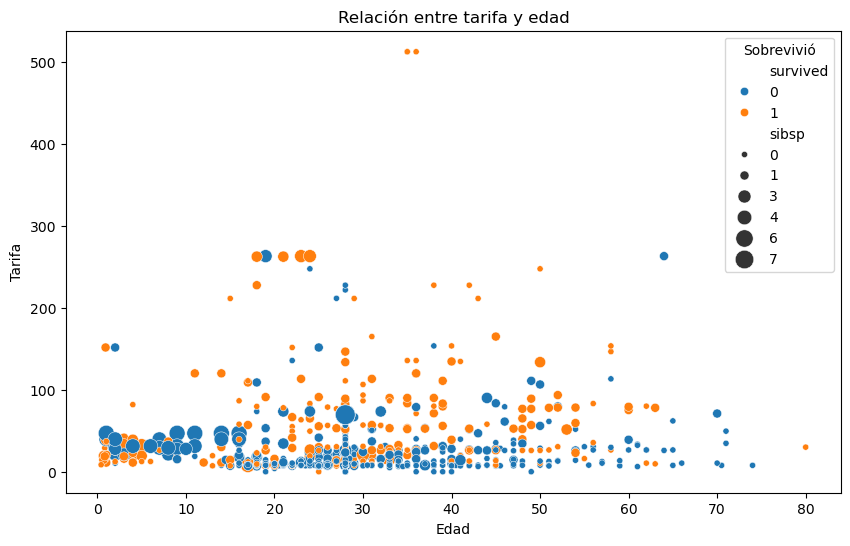

In [12]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la relación entre tarifa y edad
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', size='sibsp', sizes=(20, 200))

plt.title('Relación entre tarifa y edad')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend(title='Sobrevivió')
plt.show()

Representa la distribución de todas las combinaciones binarias de columnas con sns.pairplot.


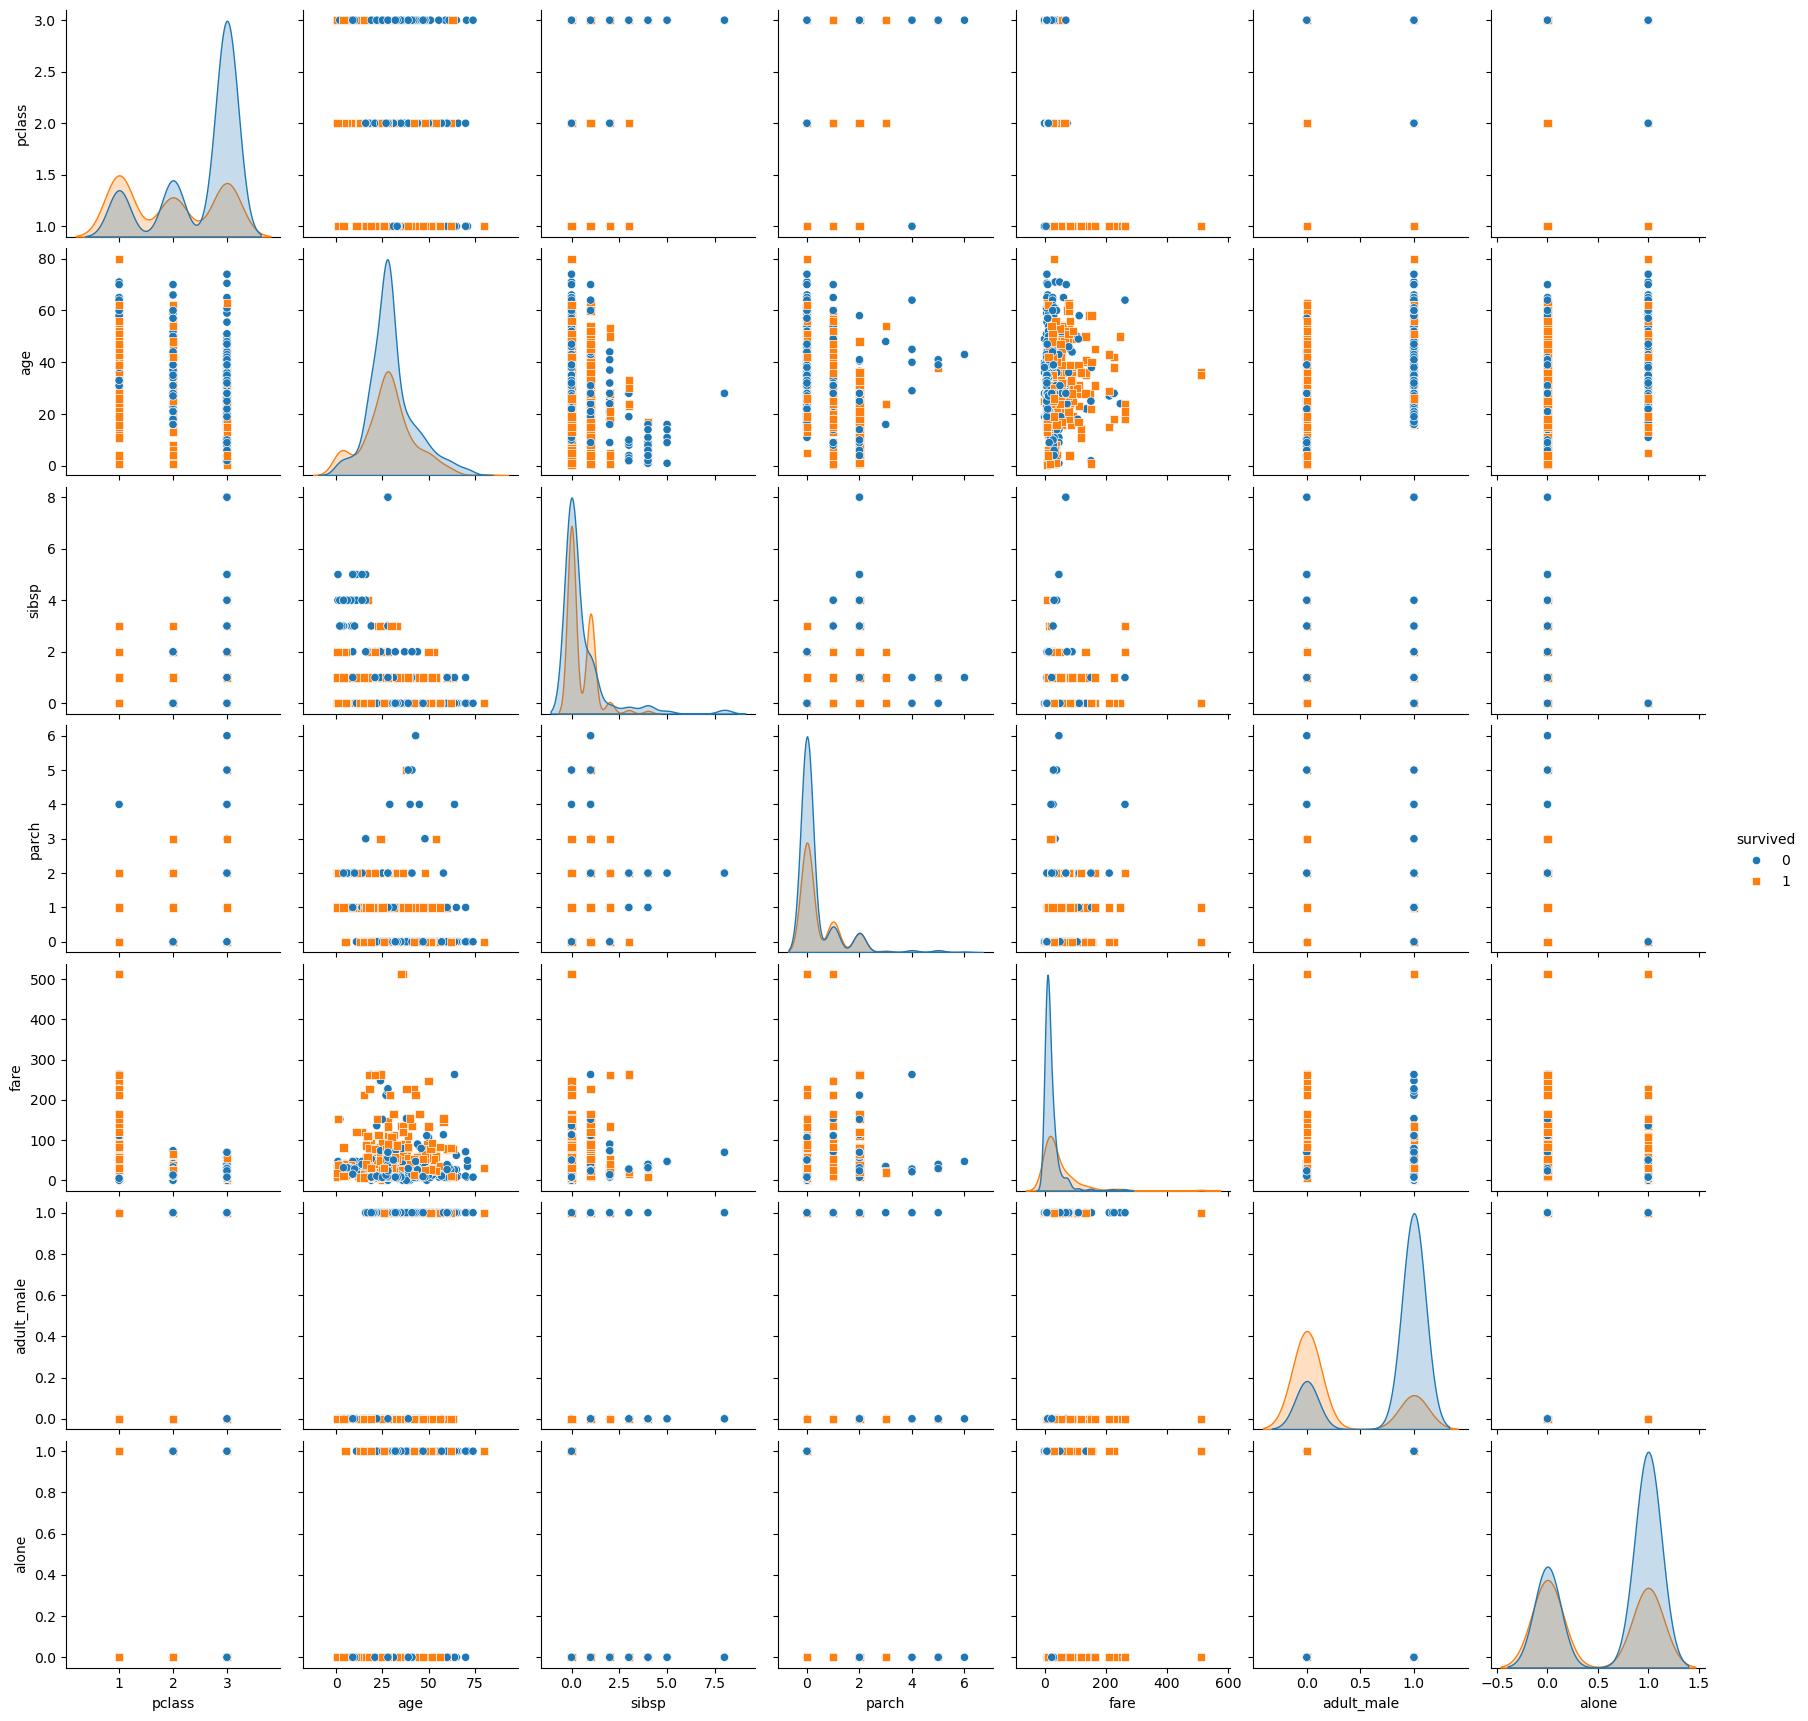

In [13]:
# Graficar la distribución de todas las combinaciones binarias de columnas
sns.pairplot(titanic, hue='survived', diag_kind='kde', markers=["o", "s"])

plt.show()

Representa las correlaciones del dataset con un mapa de calor usando sns.heatmap.
Ten en cuenta que la correlación sólo puede trabajar con valores numéricos


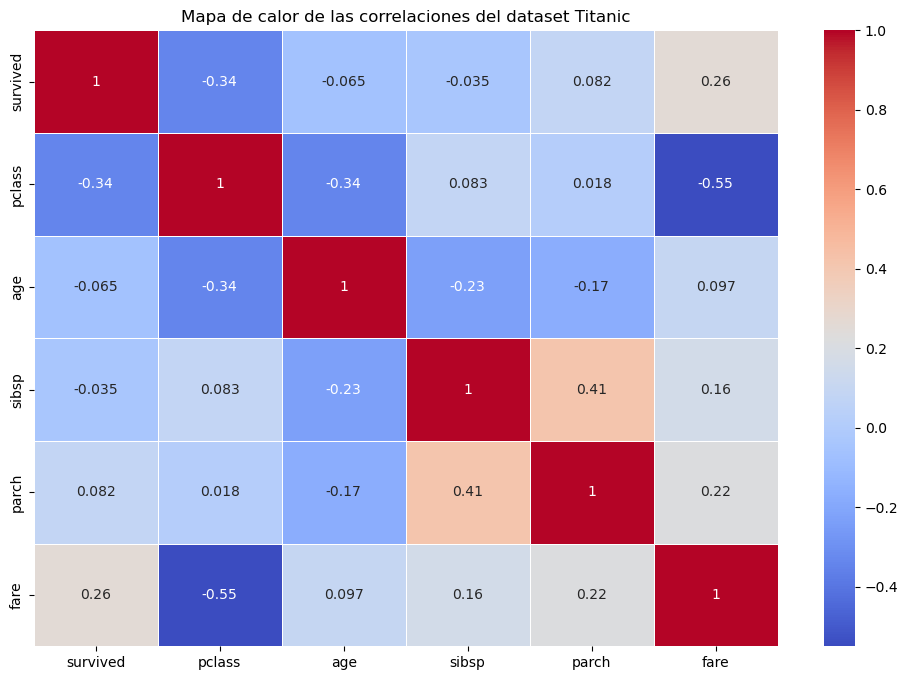

In [15]:
# Seleccionar solo las columnas numéricas
numeric_columns = titanic.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una figura
plt.figure(figsize=(12, 8))

# Graficar el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de calor de las correlaciones del dataset Titanic')
plt.show()

Representa la relación entre relación entre tarifa (fare), edad (age), clase (pclass) y tipo de persona (who).
Usa sns.relplot con las variables seleccionadas.
Usa el parámetro hue para diferenciar por survived.
Usa los facets para diferenciar por tipo de persona (who).


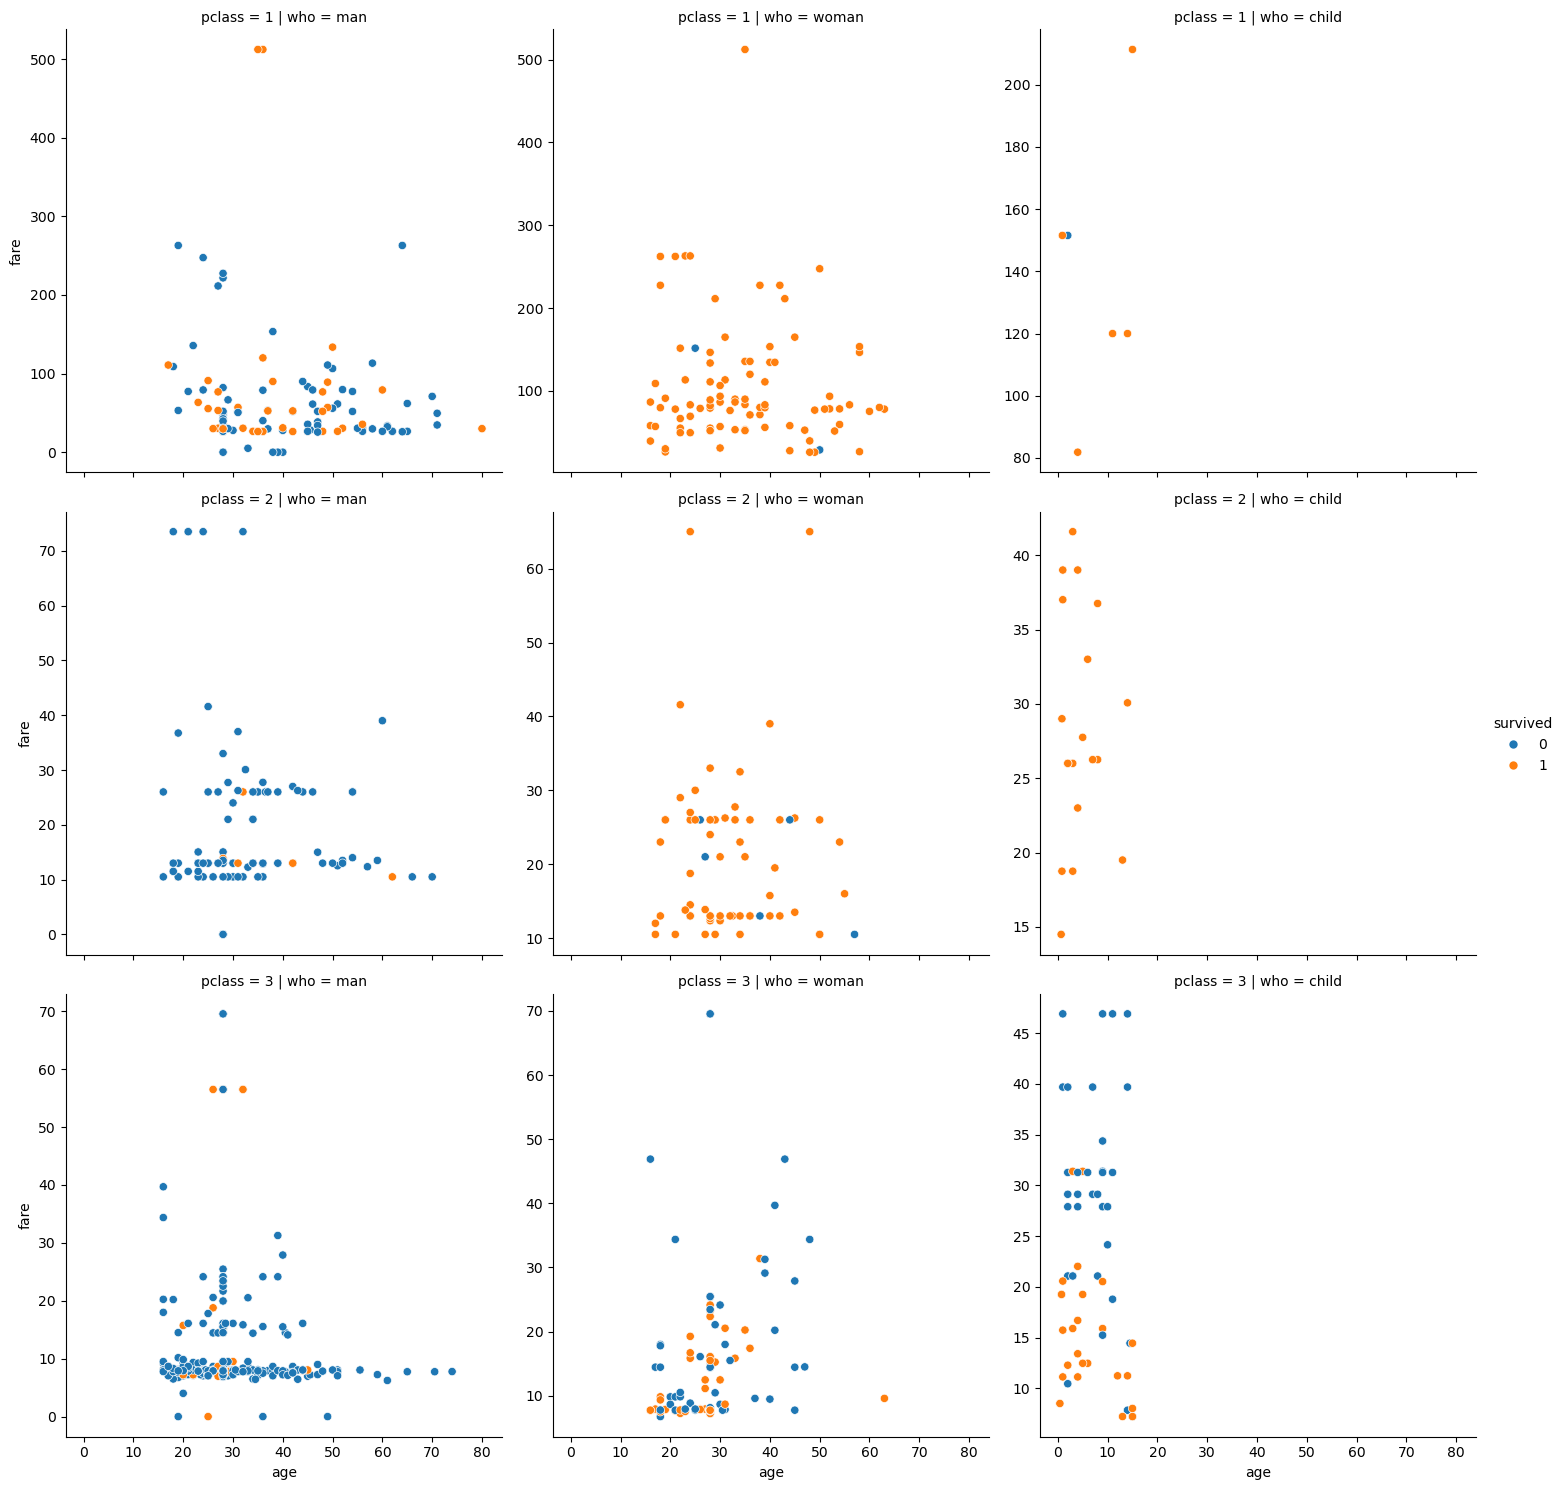

In [17]:
# Crear la gráfica relacional
sns.relplot(
    data=titanic,
    x='age', y='fare',
    hue='survived',
    col='who',
    row='pclass',
    kind='scatter',
    facet_kws={'sharey': False, 'sharex': True}
)

plt.show()

Representa las relación entre tarifa y edad con un sns.jointplot.
Usa el tipo kde para visualizar las densidades conjuntas y marginales.


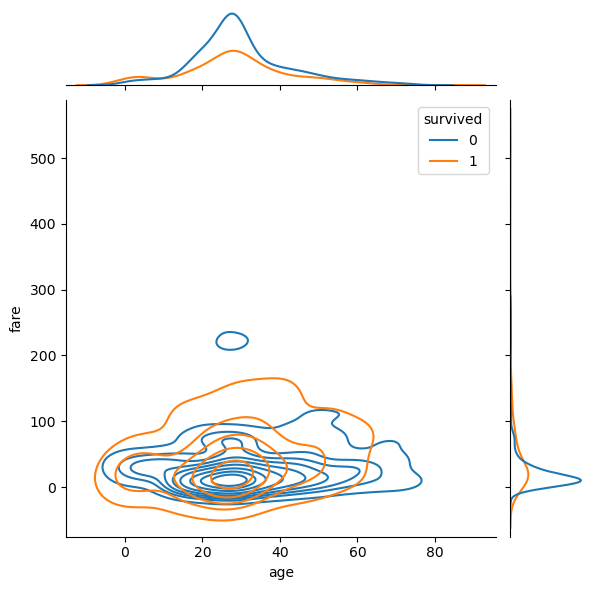

In [18]:
# Crear un jointplot para visualizar la relación entre tarifa y edad con densidades conjuntas y marginales
sns.jointplot(data=titanic, x='age', y='fare', kind='kde', hue='survived')

plt.show()

Representa la edad en función de la clase (pclass)  usando sns.catplot.
Usa hue para diferenciar por sex.
Usa los facets para diferenciar por puerto de embarque (embark_town) y si sobrevivio (suvirved).


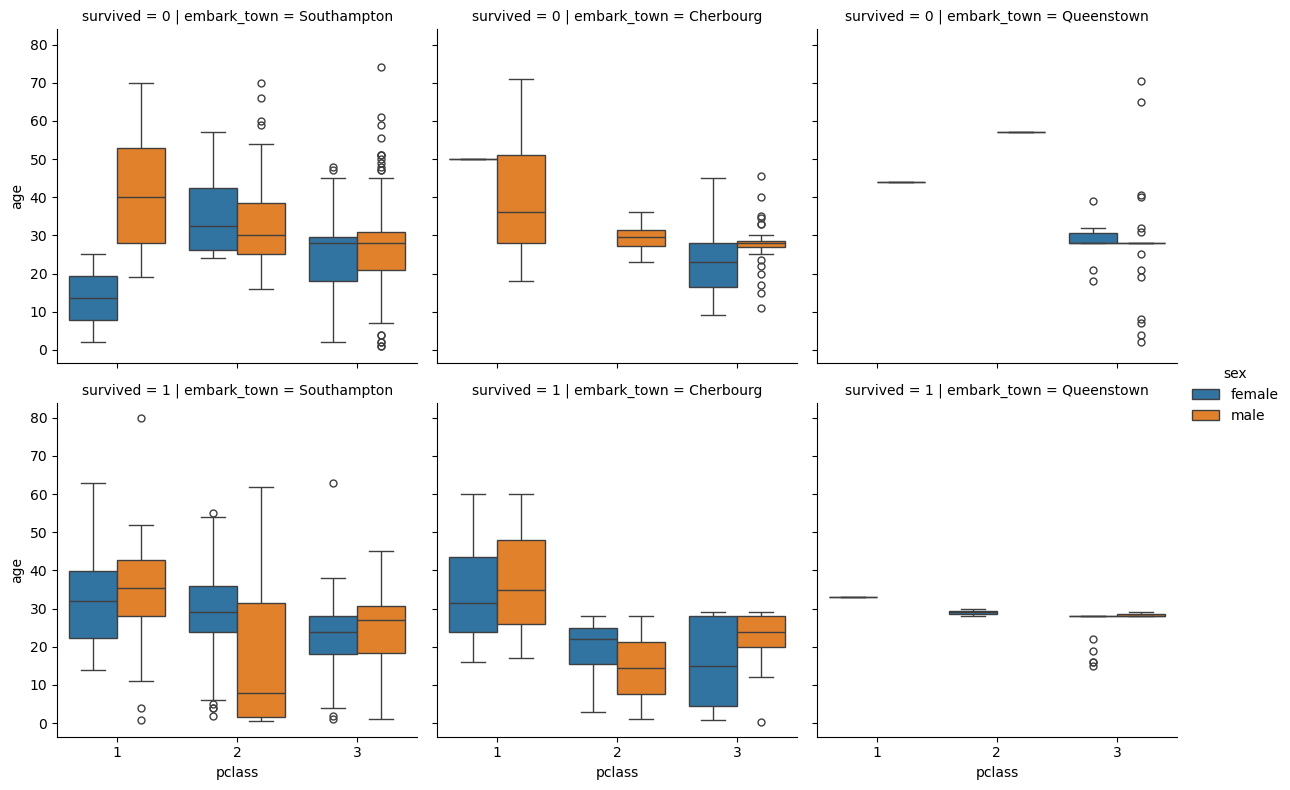

In [19]:
# Crear la gráfica categórica
sns.catplot(
    data=titanic,
    x='pclass', y='age',
    hue='sex',
    col='embark_town',
    row='survived',
    kind='box',
    height=4,
    aspect=1
)

plt.show()

Representa el cambio promedio de las tarifas (fare) según la clase utilizando un intervalo de confianza del 90%.
Usa sns.lineplot para mostrar la relación promedio entre pclass y fare.
Diferencia por sex con el parámetro hue.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13684\4157639259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.lineplot(data=titanic, x='pclass', y='fare', hue='sex', ci=90)


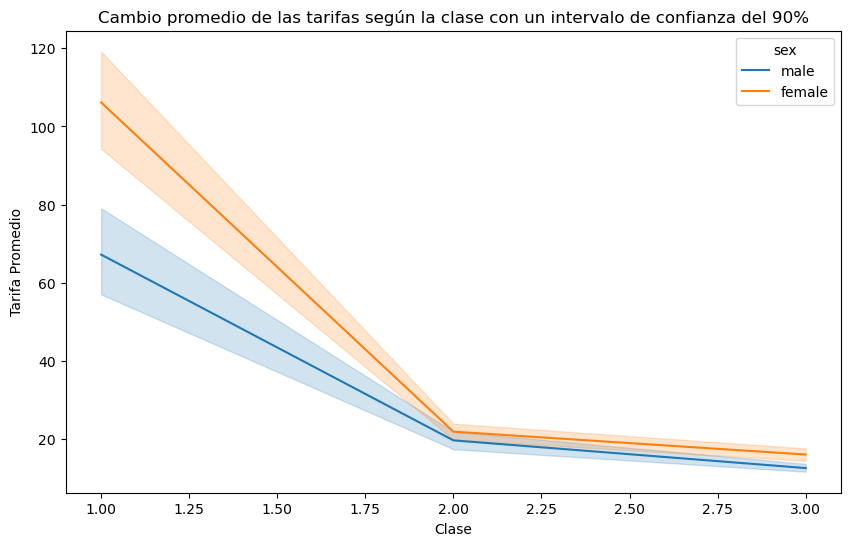

In [20]:
# Crear la gráfica de línea para mostrar la relación promedio entre pclass y fare
plt.figure(figsize=(10, 6))
sns.lineplot(data=titanic, x='pclass', y='fare', hue='sex', ci=90)

plt.title('Cambio promedio de las tarifas según la clase con un intervalo de confianza del 90%')
plt.xlabel('Clase')
plt.ylabel('Tarifa Promedio')
plt.show()

Utiliza un diagrama de dispersión categórico para comparar la distribución de tarifas (fare) entre clases (pclass).
Usa sns.stripplot y sns.swarmplot y elige el que mejor transmita la información.
Usa hue para diferenciar por tipo de persona (who).

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.7% of 

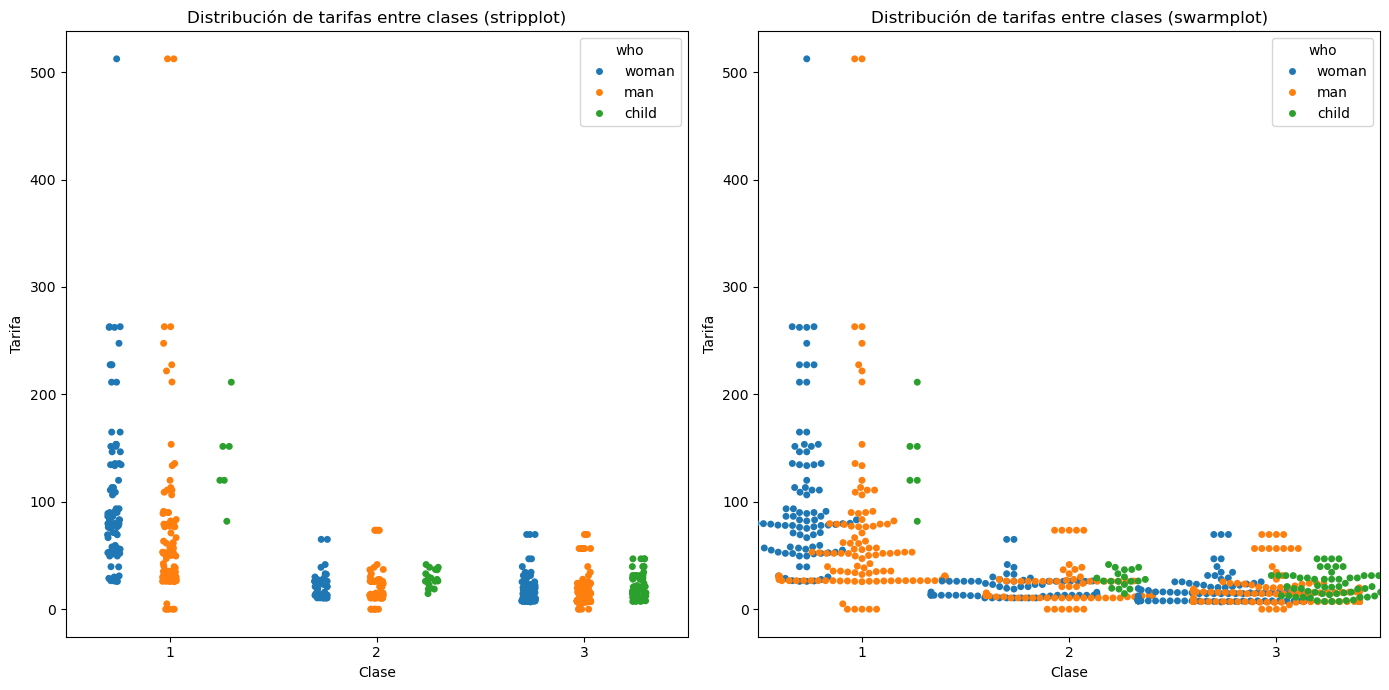

In [ ]:
# Crear una figura
plt.figure(figsize=(14, 7))

# Usar sns.stripplot para comparar la distribución de tarifas entre clases
plt.subplot(1, 2, 1)
sns.stripplot(data=titanic, x='pclass', y='fare', hue='who', jitter=True, dodge=True)
plt.title('Distribución de tarifas entre clases (stripplot)')
plt.xlabel('Clase')
plt.ylabel('Tarifa')

# Usar sns.swarmplot para comparar la distribución de tarifas entre clases
plt.subplot(1, 2, 2)
sns.swarmplot(data=titanic, x='pclass', y='fare', hue='who', dodge=True)
plt.title('Distribución de tarifas entre clases (swarmplot)')
plt.xlabel('Clase')
plt.ylabel('Tarifa')

plt.tight_layout()
plt.show()

# Swarkplot es el que mejor se diferencian los puntos, pero se colapsan si hay muchos datos. Mientras que stripplot es mejor para muchos datos, pero no se diferencian bien los puntos.

Representa la distribución de edades según clase y supervivencia.
Usa sns.catplot para mostrar la distribución de edades con un diagrama de caja y bigotes.
Diferencia por survived con el parámetro hue.
Utiliza los facets para diferenciar por sexo (sex) y tipo de persona(who)


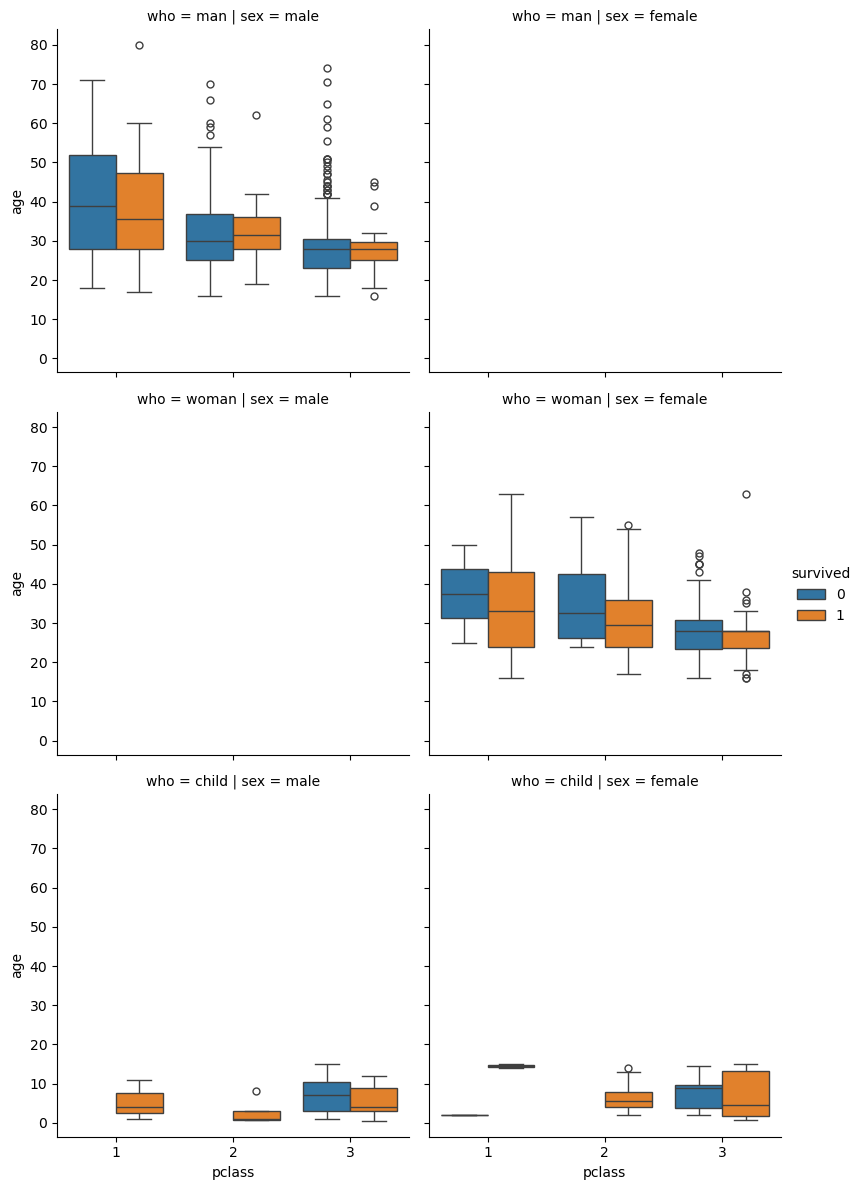

In [25]:
# Crear la gráfica categórica para mostrar la distribución de edades según clase y supervivencia
sns.catplot(
    data=titanic,
    x='pclass', y='age',
    hue='survived',
    col='sex',
    row='who',
    kind='box',
    height=4,
    aspect=1
)

plt.show()

Utiliza un diagrama de violín para mostrar las tarifas según clase y sexo.
Agrega split=True para superponer los datos masculinos y femeninos dentro de cada clase.


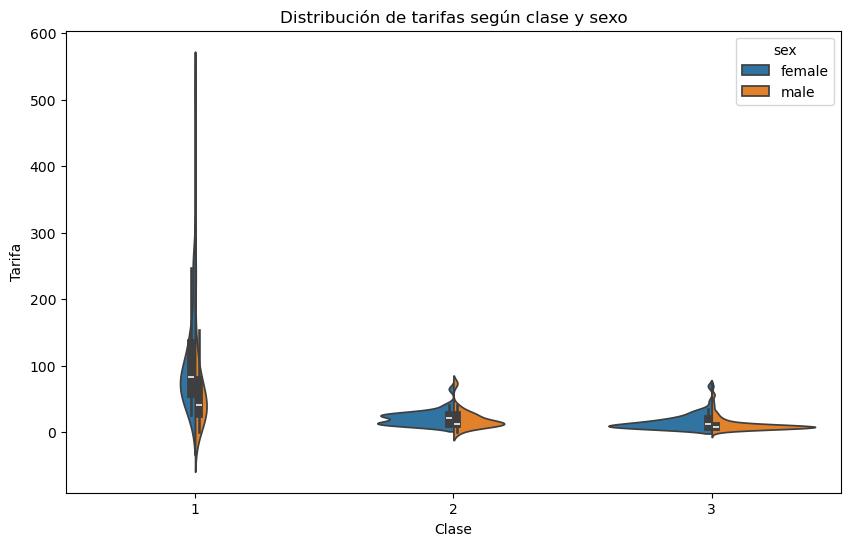

In [26]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Usar sns.violinplot para mostrar las tarifas según clase y sexo con split=True
sns.violinplot(data=titanic, x='pclass', y='fare', hue='sex', split=True)

plt.title('Distribución de tarifas según clase y sexo')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

Representa el porcentaje de supervivencia por clase y sexo utilizando un diagrama de barras.
Utiliza los facets para diferenciar por categoría de edad (valores de edad agrupados de 10 en 10). Mostrando como mucho 3 columnas y tantas filas necesites.


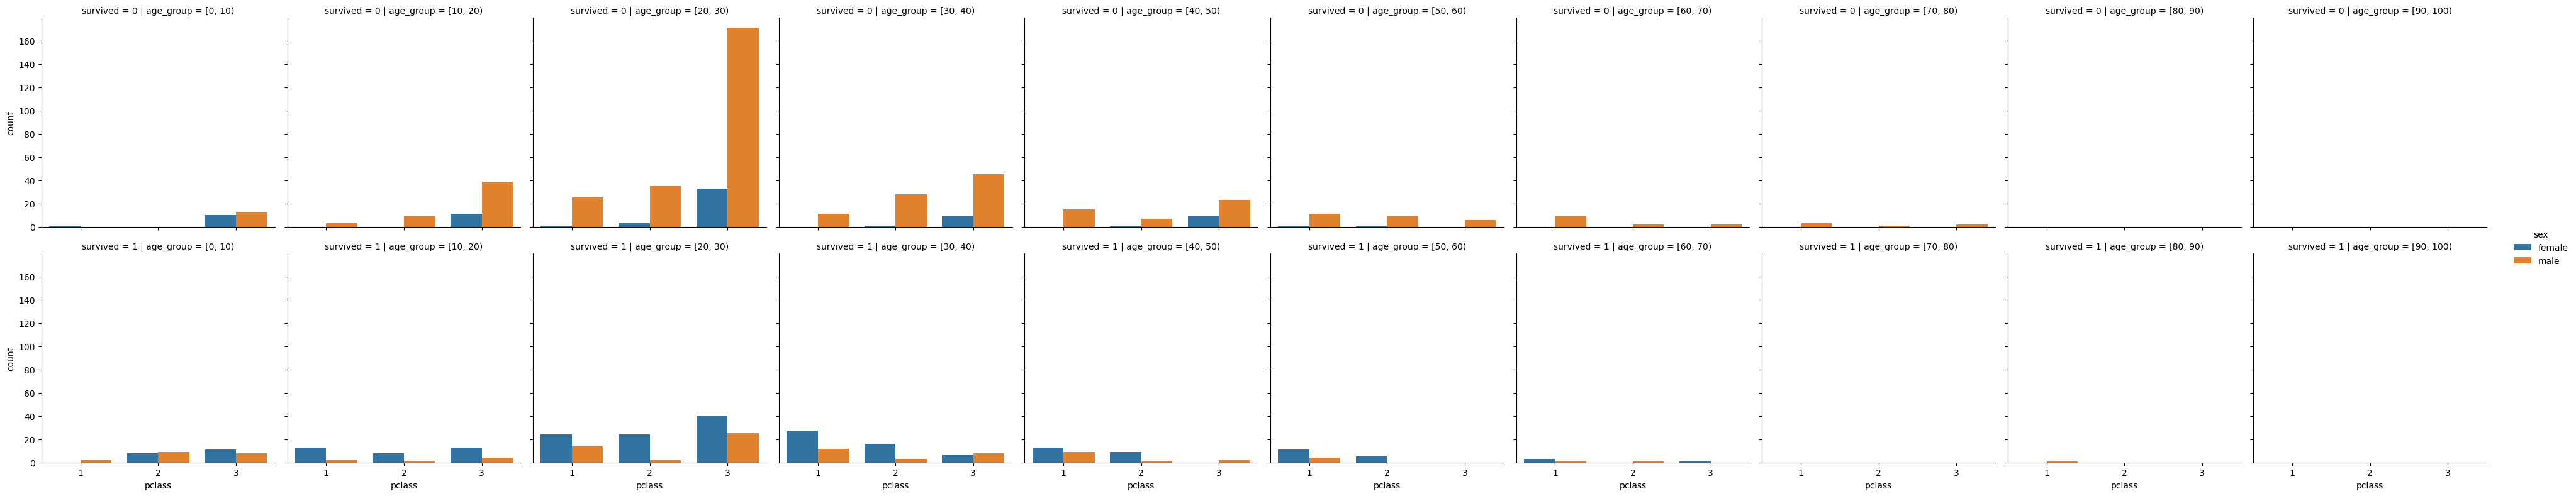

In [28]:
# Crear una nueva columna para agrupar las edades en categorías de 10 en 10
titanic['age_group'] = pd.cut(titanic['age'], bins=range(0, 101, 10), right=False)

# Crear la gráfica categórica para mostrar el porcentaje de supervivencia por clase y sexo
sns.catplot(
    data=titanic,
    x='pclass', hue='sex', col='age_group', row='survived',
    kind='count', height=4, aspect=1
)

plt.show()

Representa una línea de regresión entre la tarifa y la edad.


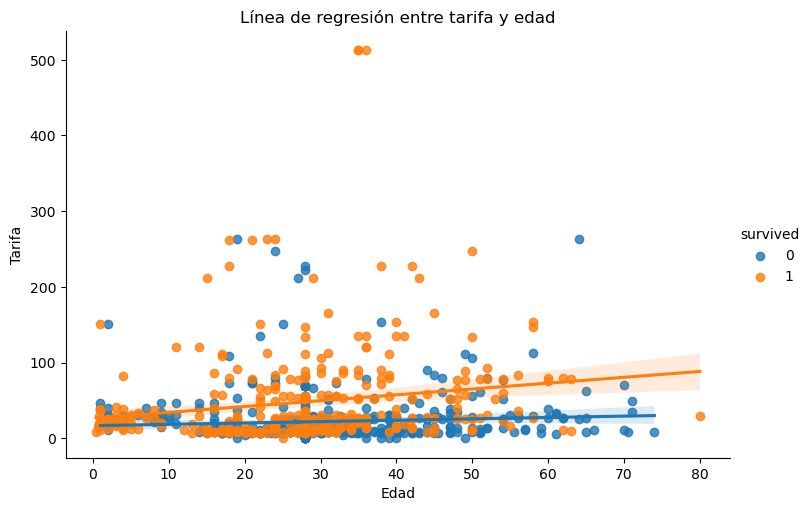

In [29]:
# Crear la gráfica de regresión entre tarifa y edad
sns.lmplot(data=titanic, x='age', y='fare', hue='survived', aspect=1.5)

plt.title('Línea de regresión entre tarifa y edad')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

Representa una línea de regresión entre la tarifa y la edad segmentando por sexo y clase.


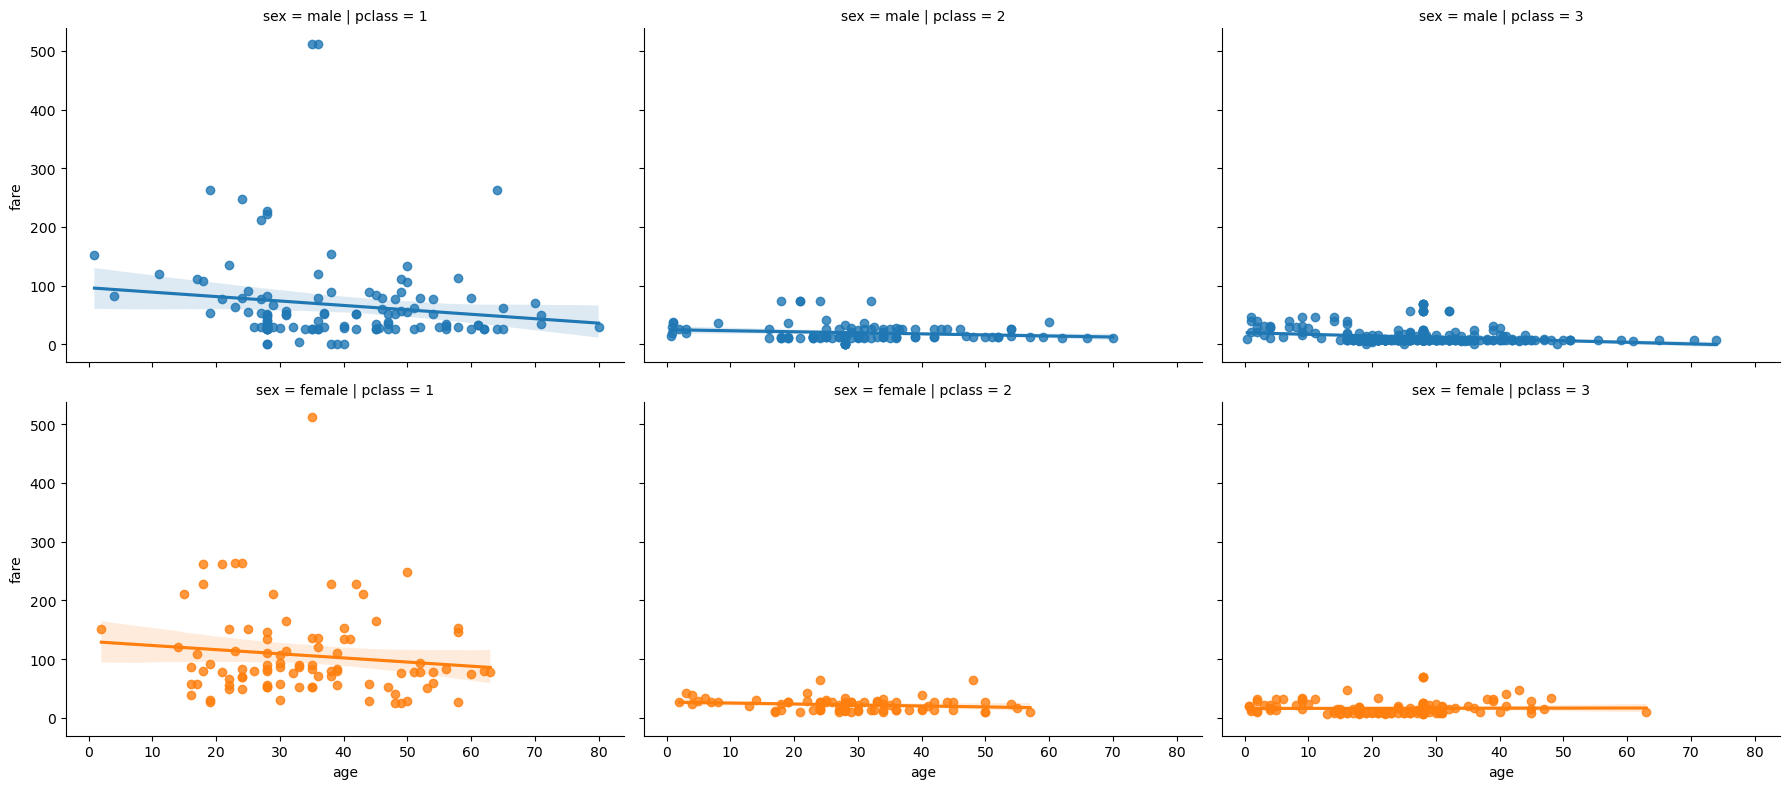

In [30]:
# Crear la gráfica de regresión entre tarifa y edad segmentando por sexo y clase
sns.lmplot(
    data=titanic,
    x='age', y='fare',
    hue='sex',
    col='pclass',
    row='sex',
    aspect=1.5,
    height=4
)

plt.show()